# Visualización funciones de activación 
Bibliografía consultada a fecha de 9-02-2022: 
- Uso de notebook: https://datatofish.com/add-julia-to-jupyter/
- Cómo visualizar funciones en julia: https://docs.juliaplots.org/latest/tutorial/ 
- Definir funciones: https://docs.julialang.org/en/v1/manual/functions/
- Sobre tipos: https://docs.julialang.org/en/v1/manual/types/

In [4]:
# Paquetes
using Plots
img_path = "../doc/img/articulo_rrnn_aproximadores_universales/"

"../doc/img/articulo_rrnn_aproximadores_universales/"

In [92]:
function CosineSquaser(x::Real) :: Real
    salida = 1
    if x < - pi/2 
        salida =  0
    elseif x <=  pi/2 
        salida =  1/2 * (1 + cos( x - pi/2))
    end
    return salida
end

plot( CosineSquaser, -pi, pi, title="Cosine Squaser", label="")
savefig(img_path*"cosineSquaser.png") 

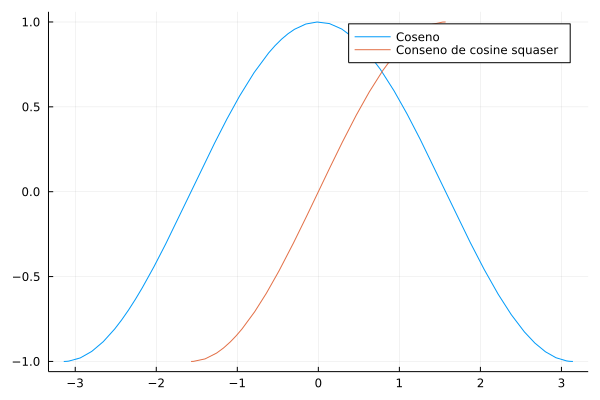

In [9]:
plot(cos, -pi, pi, label="Coseno")
f(x) = cos(x + 3* pi /2)
plot!(f, -pi/2, pi/2, label="Conseno de cosine squaser")

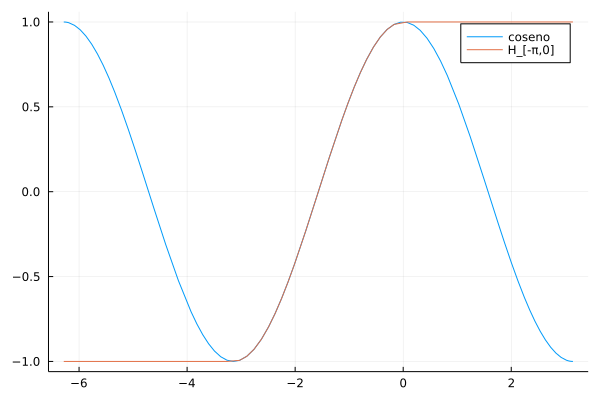

In [99]:
# Tramo en el que son iguales
F = CosineSquaser
plot(cos, -pi*2,pi ,label="coseno")
F_1(x) = 2*F(x+pi/2)- F(x + 1000)  # 1000 = 2 pi M
plot!(F_1, -pi*2,pi, label= "H_[-π,0] ")
savefig(img_path*"H_menos_pi_0.png") 
plot(cos, -pi*2,pi ,label="coseno")
plot!(F_1, -pi*2,pi, label= "H_[-π,0] ")

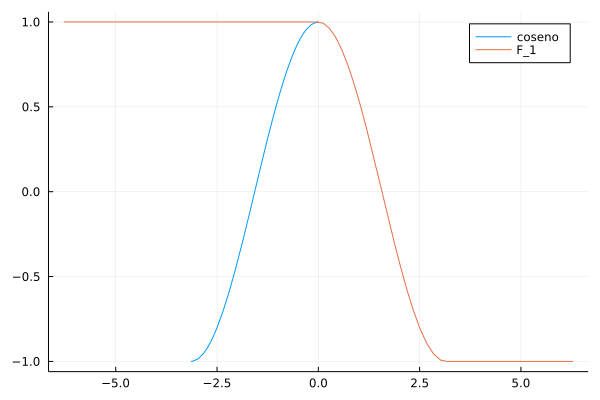

In [95]:
# Tramo simétrico 
F_2(x) = F_1(-x )

plot(cos, -pi,0 ,label="coseno")
plot!(F_2, -2*pi, 2*pi, label= "H")
savefig(img_path*"H_menos_pi_0.png") 
plot(cos, -pi,0 ,label="coseno")
plot!(F_2, -2*pi, 2*pi, label= "F_1")

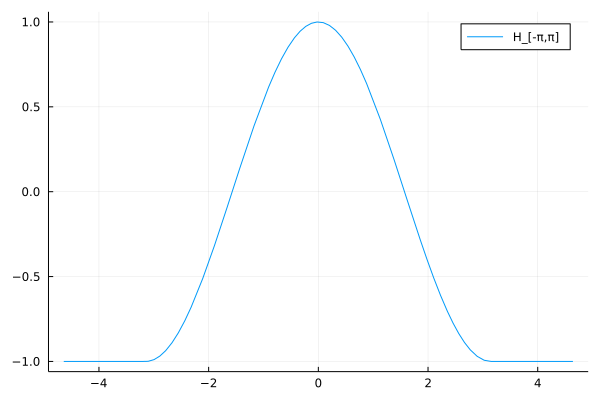

In [106]:
F_3(x) = (F_1(x) + F_2(x))-1
plot(F_3, -pi -1.5, pi + 1.5, label=" H_[-π,π]")
savefig(img_path*"H_menos_pi_mas_pi.png") 
plot(F_3, -pi -1.5, pi + 1.5, label=" H_[-π,π]")

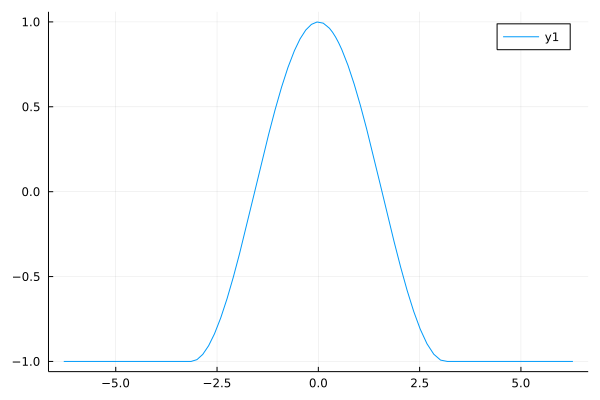

In [68]:
plot(F_3, -2*pi, 2*pi )

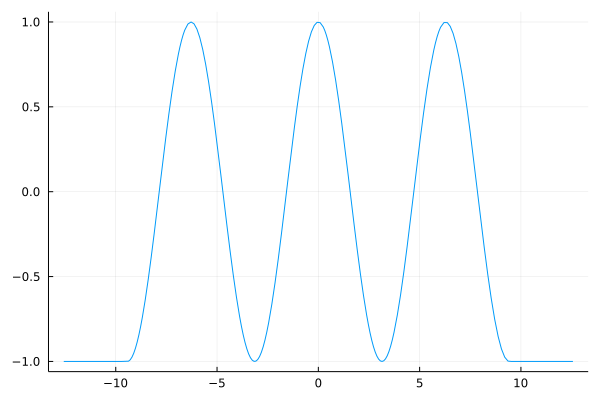

In [109]:
F_4(x)=F_3(x)+F_3(x-2*pi) + 1  + F_3(x + 2*pi) + 1
plot(F_4, -4*pi, 4*pi, label="" )
savefig(img_path*"ejemplo_H_Grande.png") 
plot(F_4, -4*pi, 4*pi, label="" )

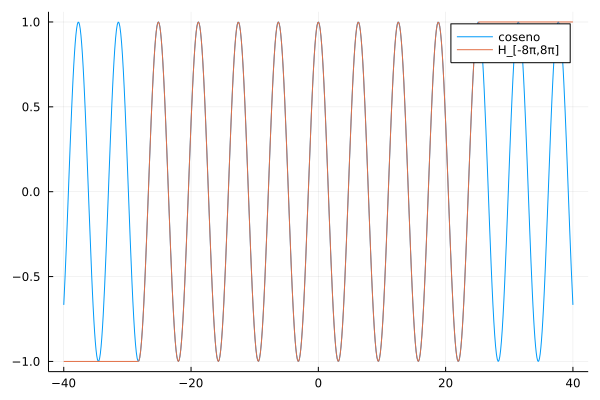

In [85]:
# Función genérica 
function CosineSquaser(x::Real) :: Real
    salida = 1
    if x < - pi/2 
        salida =  0
    elseif x <=  pi/2 
        salida =  1/2 * (1 + cos( x - pi/2))
    end
    return salida
end
F = CosineSquaser
F_1(x) = 2*F(x+pi/2)- 1 # H_[-π,0]
F_2(x) = F_1(-x )       # H_[0, π]
F_3(x) = (F_1(x) + F_2(x))-1 # H_[-π,π]

function CosenoPropio(N)
    function f(x)
        resultado = F_1(x) 
        for i = 1:N
            resultado  +=  F_3(x + 2*pi*i) - F_3(- x + 2*pi*i -pi)
            
        end
        return resultado
    end
    return f
end

M = 40
for N in [1,2,4]
    n = 2*N
    f_label = 
    plot(cos, -M,M ,label="coseno")
    plot!(Coseno_propio, -M, M, label="H_[-8π,8π]")
    savefig(img_path*"H_menos_ocho_pi_más_ocho_pi.png") 
    plot(cos, -M,M ,label="coseno")
    plot!(CosenoPropio(4), -M, M, label="H_[-8π,8π]")
end 

In [89]:
for n in [1,2,3]
    m = "Hola $(n*2)"
    println(m)
end

Hola 2
Hola 4
Hola 6
